# Avaliação SUBSTITUTIVA de Ciência dos dados - 06/12/2018

___
# Nome: GABARITO

___
### Leia atentamente as instruções da avaliação descritas na parte em papel e que devem ser seguidas rigorosamente aqui!

___


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
dados = pd.read_excel("Marvak.xlsx")

In [3]:
dados.head()

,ID,IDADE,SEXO,RESIDENCIA,EC,SALARIO_ANUAL,GASTO_ANUAL
0,1,Jovem,Feminino,Alugada,Solteiro,86000.00,1053.00
1,2,Jovem,Feminino,Propria,Casado,48543.74,321.03
2,3,Jovem,Feminino,Propria,Solteiro,14760.10,375.03
3,4,Adulto,Feminino,Alugada,Solteiro,19900.00,262.00
4,5,Idoso,Masculino,Alugada,Casado,119000.00,278.00


In [4]:
dados.columns

Index(['ID', 'IDADE', 'SEXO', 'RESIDENCIA', 'EC', 'SALARIO_ANUAL',
       'GASTO_ANUAL'],
      dtype='object')

In [5]:
dados.IDADE = dados.IDADE.astype('category')
dados.SEXO = dados.SEXO.astype('category')
dados.RESIDENCIA = dados.RESIDENCIA.astype('category')
dados.EC = dados.EC.astype('category')

In [6]:
dados.dtypes

ID                  int64
IDADE            category
SEXO             category
RESIDENCIA       category
EC               category
SALARIO_ANUAL     float64
GASTO_ANUAL       float64
dtype: object

___
## PROBLEMA

A Marvak, uma renomada loja de departamentos, decidiu realizar uma pesquisa para verificar uma possível associação entre algumas características de seus clientes com seus gastos anuais na loja.

Dessa forma, foi selecionada aleatoriamente uma amostra aleatória de $1.000$ clientes que já fizeram compra na Marvak em todas as filiais no último ano e foram observadas as seguintes informações:

* **IDADE**: idade do cliente, que foi categorizada em jovem (até 30 anos), adulto (de 31 a 55 anos) ou idoso (56 ou mais anos);
* **SEXO**: sexo do cliente (feminino ou masculino);
* **RESIDENCIA**: tipo de residência do cliente (alugada ou própria);
* **EC**: estado civil do cliente (casado ou solteiro);
* **SALARIO_ANUAL**: salário anual do cliente (em reais); e
* **GASTO_ANUAL**: gasto total anual do cliente em compras realizadas na Marvak (em reais).


___
### Questão 2 (3,50 pontos) - TESTE DE HIPÓTESES

O departamento financeiro da Marvak acredita que os clientes de qualquer filial dessa rede gastaram, em média, mais do que $500$ reais no último ano.

Levando em consideração a amostra disponível na base de dados, verifique se há evidências suficiente para afirmar que a suspeita do departamento financeiro procede.

**Para resolução desta questão, deixe claro:**

1) Construção das Hipóteses Nula e Alternativa em termos do problema e do parâmetro. `(1,0 ponto)`

2) Cálculo do valor *p* do teste. `(0,75 ponto)`

3) Conclusão em termos do problema, deixando claro quais resultados foram utilizados para tal decisão. `(0,75 ponto)`

4) Qual ou quais suposições foram feitas para a escolha da distribuição utilizada no item (2) desta questão. Se há suposição para a distribuição de probabilidades da variáveis de interesse, verifique-a de utilizando algum recurso gráfico. `(1,0 ponto)`

**R.:**
1)

$H_0: \mu=500 \rightarrow $ Suspeita do departamento financeiro não procede

$H_1: \mu > 500 \rightarrow $ Suspeita do departamento financeiro procede

**R.:**
2)

In [7]:
import scipy.stats as stats
import numpy as np

In [8]:
#Aula 21
xbarra=np.mean(dados.GASTO_ANUAL)
s=np.std(dados.GASTO_ANUAL, ddof=1)
n=len(dados.GASTO_ANUAL)
print("Média Amostral: ", xbarra)
print("Desvio padrão Amostral: ", s)
print("Tamanho da amostra: ", n, "\n")

#Valor p sob a suposição de X~Normal
print("Valor p: ", (1-stats.t.cdf(xbarra, df = n-1, loc=510, scale=s/n**(0.5)))*100,"%\n")

#Valor p sob a suposição de n suficientemente grande -> S2 consistente para sigma2 e com isso, uso do TLC
print("Valor p: ", (1-stats.norm.cdf(xbarra, loc=510, scale=s/n**(0.5)))*100,"%\n")

Média Amostral:  528.7876999999999
Desvio padrão Amostral:  331.0430157139145
Tamanho da amostra:  1000 

Valor p:  3.6502750536620776 %

Valor p:  3.6351636596089754 %



**R.:**
3)


Assumindo nível de significância de 5%, por exemplo, vemos que valor *p* é menor do que 5%.

Logo, há evidências de que suspeita do departamento financeiro procede, com 5% de significância.

**R.:**
4)

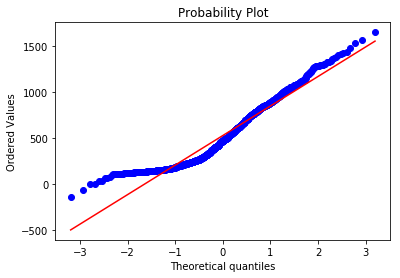

In [9]:
#Aula 21 Exercício 3 (Pergunta 1) quando feito uso da distribuição t no cálculo do valor p!
stats.probplot(dados.GASTO_ANUAL, dist="norm", plot=plt);

Percebe-se uma concentração dos menores valores de GASTO ANUAL fora da linha vermelha no `probplot` de Normal. Desse modo, é razoável assumir que a variável aleatória original não deva ser normal. 

___
### Questão 3 (3,50 pontos) - MODELO DE PREDIÇÃO

Assuma que o objetivo da Marvak seja traçar o perfil de clientes com maior potencial de consumo na loja Marvak. Ou seja, considerando as variáveis mensuradas na base de dados, quais as características que melhor definem o segmento de clientes da Marvak.

Assim, considere que a variável `GASTO_ANUAL` é a variável-alvo a ser predita e as demais variáveis da base de dados são as variáveis explicativas.

 
**Para resolução desta questão, faça:**

1) Gráfico de dispersão do `SALARIO_ANUAL` versus `GASTO_ANUAL` separando os clientes que residem em casa `Alugada` e casa `Propria`. Interprete-o. `(0,75 ponto)`
 
 
2) Considerando apenas os clientes que possuem residência `Alugada`, ajuste uma reta para prever `GASTO_ANUAL` de acordo com o `SALARIO_ANUAL` do cliente. Considerando o valor *p* de um ajuste linear, a reta é significante? Qual deve ser o `GASTO_ANUAL` previsto para um cliente que possui residência `Alugada` e `SALARIO_ANUAL` de 130 mil reais? `(1,00 ponto)`
 
 
3) Considerando apenas os clientes que possuem residência `Propria`, ajuste uma reta para prever `GASTO_ANUAL` de acordo com o `SALARIO_ANUAL` do cliente. Considerando o valor *p* de um ajuste linear, a reta é significante? Qual deve ser o `GASTO_ANUAL` previsto para um cliente que possui residência `Propria` e `SALARIO_ANUAL` de 130 mil reais? `(1,00 ponto)`


4) As variáveis `RESIDENCIA` e  `SALARIO_ANUAL` poderiam ser consideradas simultaneamente num modelo de regressão para estimar `GASTO_ANUAL` de um cliente da Marvak? Justifique. **Nota:** Aqui não é necessário ajustar um modelo, mas sim explicar se seria possível e como você procederia deixando claro os cuidados que teria para incluir ambas as variáveis no modelo. `(0,75 ponto)`
 


**R.:**
1)

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

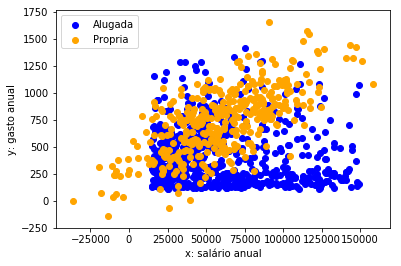

In [11]:
x = dados.SALARIO_ANUAL.loc[dados.RESIDENCIA=="Alugada"]
y = dados.GASTO_ANUAL.loc[dados.RESIDENCIA=="Alugada"]
plt.scatter(x,y, color="blue");
plt.xlabel("x: salário anual");
plt.ylabel("y: gasto anual");

x = dados.SALARIO_ANUAL.loc[dados.RESIDENCIA=="Propria"]
y = dados.GASTO_ANUAL.loc[dados.RESIDENCIA=="Propria"]
plt.scatter(x,y, color="orange");

plt.legend(("Alugada","Propria"));

Interpretação: Nota-se que a relação entre salário anual e gasto anual acontece muda de acordo com tipo de residência do cliente. Quando possui residência própria, há indicíos de associação linear positiva entre essas duas variáveis quantitativas; o mesmo não ocorre quando a residência é alugada, que aparenta ausência de associação.

**R.:**
2)

In [12]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [13]:
X = dados.SALARIO_ANUAL.loc[dados.RESIDENCIA=="Alugada"]
y = dados.GASTO_ANUAL.loc[dados.RESIDENCIA=="Alugada"]

In [14]:
results = regress(X,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GASTO_ANUAL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4290
Date:                Thu, 30 May 2019   Prob (F-statistic):              0.513
Time:                        12:08:37   Log-Likelihood:                -4370.1
No. Observations:                 622   AIC:                             8744.
Df Residuals:                     620   BIC:                             8753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           411.2357     21.137     19.456      0.000     369.727     452.745
SALARIO_ANUAL    -0.0002      0.000     -0.655      0.513      -0.001       0.000
==============================================================================
Omnibus:                      127.098   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.269
Skew:                           1.293   Prob(JB):                     3.61e-46
Kurtosis:                       4.178   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

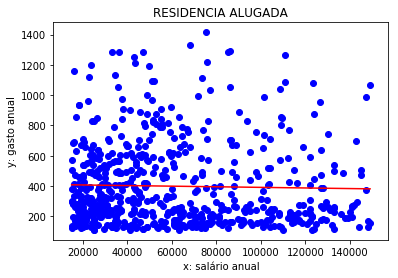

In [15]:
#Reta ajustada (cor vermelha) cria valores de X a partir do valor mínimo e máximo da variável explicativa X
X_valores = np.linspace(X.min(), X.max(), 10)
X_modelo = sm.add_constant(X_valores)
y_pred = results.predict(X_modelo)
plt.plot(X_valores, y_pred, color="r")


#Coloca valores observados na base de dados - pontos azuis
plt.scatter(X, y, color="blue");
plt.title("RESIDENCIA ALUGADA")
plt.xlabel("x: salário anual");
plt.ylabel("y: gasto anual");

In [16]:
#Valor ajustado para x=130
y_pred = results.predict((1,130))
print("Quando x=130, então o valor previsto para gasto anual é ", y_pred)

Quando x=130, então o valor previsto para gasto anual é  [411.20999092]


**Interpretação:** De acordo com o valor *p* do coeficiente angular, não há indícios de que a reta seja significante já que valor *p* é maior do que 10%.

**R.:**
3)

In [17]:
X = dados.SALARIO_ANUAL.loc[dados.RESIDENCIA=="Propria"]
y = dados.GASTO_ANUAL.loc[dados.RESIDENCIA=="Propria"]

In [18]:
results = regress(X,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GASTO_ANUAL   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     340.8
Date:                Thu, 30 May 2019   Prob (F-statistic):           1.24e-54
Time:                        12:08:37   Log-Likelihood:                -2580.0
No. Observations:                 378   AIC:                             5164.
Df Residuals:                     376   BIC:                             5172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           350.9599     24.084     14.572      0.000     303.603     398.316
SALARIO_ANUAL     0.0065      0.000     18.461      0.000       0.006       0.007
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.005
Skew:                           0.009   Prob(JB):                        0.997
Kurtosis:                       3.007   Cond. No.                     1.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

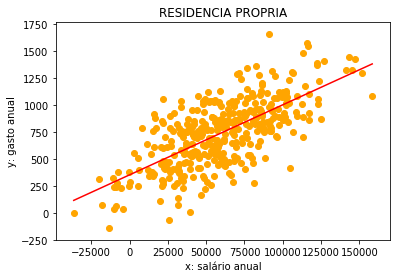

In [19]:
#Reta ajustada (cor vermelha) cria valores de X a partir do valor mínimo e máximo da variável explicativa X
X_valores = np.linspace(X.min(), X.max(), 10)
X_modelo = sm.add_constant(X_valores)
y_pred = results.predict(X_modelo)
plt.plot(X_valores, y_pred, color="r")


#Coloca valores observados na base de dados - pontos laranjas
plt.scatter(X, y, color="orange");
plt.title("RESIDENCIA PROPRIA")
plt.xlabel("x: salário anual");
plt.ylabel("y: gasto anual");


In [20]:
#Valor ajustado para x=130
y_pred = results.predict((1,130))
print("Quando x=130, então o valor previsto para gasto anual é ", y_pred)

Quando x=130, então o valor previsto para gasto anual é  [351.80339996]


**Interpretação:** De acordo com o valor *p* do coeficiente angular, há indícios de que a reta seja significante já que valor *p* é menor do que 10%.

Nesse caso, entre os clientes que residem em casa própria, a cada $1$ real no salário anual é de se esperar que o gasto anual do cliente aumente em $0.0065$ real. 

Parafraseando, a cada $100$ reais no salário anual de um cliente com casa própria é de se esperar que o gasto anual do cliente aumente em $0.65$ real. 

**R.:**
4)

As variáveis `RESIDENCIA` e  `SALARIO_ANUAL`poderiam ser consideradas simultaneamente num modelo de regressão múltipla.

Entre outras coisas, o mais importante é aluno dizer que a variável `RESIDENCIA` é uma variável qualitativa e portanto a mesma deveria ser transformada em `dummy` nesse modelo de regressão múltipla.